# Import Library & Dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Baca file
file_path = 'penjualan_artlinx_full_2024.xlsx'
df = pd.read_excel(file_path)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296637 entries, 0 to 296636
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Tanggal           296637 non-null  datetime64[ns]
 1   Kode              296264 non-null  object        
 2   Nama Produk       296637 non-null  object        
 3   Merk              296637 non-null  object        
 4   Jenis Brand       296637 non-null  object        
 5   Kategori 1        296637 non-null  object        
 6   Kategori 2        296637 non-null  object        
 7   Kategori ID       296637 non-null  int64         
 8   Metode Penjualan  296637 non-null  object        
 9   Harga Jual        296637 non-null  int64         
 10  Qty               296637 non-null  int64         
 11  Diskon            296637 non-null  int64         
 12  Total Penjualan   296637 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memor

In [52]:
df.head(5)

,Tanggal,Kode,Nama Produk,Merk,Jenis Brand,Kategori 1,Kategori 2,Kategori ID,Metode Penjualan,Harga Jual,Qty,Diskon,Total Penjualan
0,2024-01-01,CYAKC00042,Keychain Seventeen Plush Hoshi,CYARTT,LOKAL,Fanart / Fanmerch,"Korea (Idol, Drama)",255340268,Offline,38000,2,5,72200.0
1,2024-01-01,JSYPN00016,PIN JSY 32mm Lagi Embuh,JARESAYANG,LOKAL,Aksesoris,Pin / Brooch,255658197,Offline,10000,2,30,14000.0
2,2024-01-01,JSYPN00016,PIN JSY 32mm Lagi Embuh,JARESAYANG,LOKAL,Aksesoris,Pin / Brooch,255658197,Offline,10000,2,30,14000.0
3,2024-01-01,JSYKC00009,Keychain JSY Nangiso Rapopo,JARESAYANG,LOKAL,"Gantungan Kunci, Tas, dan HP","Acrylic, Resin, Epoxy, Clay",255656946,Offline,22000,4,0,88000.0
4,2024-01-01,JSYKC00011,Keychain JSY Mie Ayam,JARESAYANG,LOKAL,"Gantungan Kunci, Tas, dan HP","Acrylic, Resin, Epoxy, Clay",255656946,Offline,22000,4,0,88000.0


In [53]:
# Filter data ATK
df_atk = df[df['Jenis Brand'] == 'ATK'].copy()
print(f"Jumlah data produk ATK: {len(df_atk)}")

Jumlah data produk ATK: 229560


In [54]:
# Filter data lokal
df_lokal = df[df['Jenis Brand'] == 'LOKAL'].copy()
print(f"Jumlah data produk lokal: {len(df_lokal)}")

Jumlah data produk lokal: 67077


In [55]:
df_lokal.describe()

,Tanggal,Kategori ID,Harga Jual,Qty,Diskon,Total Penjualan
count,67077,6.707700e+04,67077.000000,67077.000000,67077.000000,67077.000000
mean,2024-08-04 01:48:53.100764416,2.531181e+08,23029.820013,2.867749,7.108696,62806.500650
min,2024-01-01 00:00:00,3.154088e+07,2000.000000,1.000000,0.000000,1875.000000
25%,2024-05-15 00:00:00,2.553402e+08,15000.000000,2.000000,0.000000,28000.000000
50%,2024-08-19 00:00:00,2.556569e+08,22000.000000,3.000000,0.000000,66000.000000
75%,2024-10-31 00:00:00,2.556569e+08,28500.000000,4.000000,10.000000,88000.000000
max,2024-12-31 00:00:00,2.556582e+08,295000.000000,5.000000,50.000000,960000.000000
std,NaN,2.265566e+07,14305.953275,1.148740,11.101428,40709.188184


In [56]:
df_lokal.isnull().sum()

Tanggal             0
Kode                0
Nama Produk         0
Merk                0
Jenis Brand         0
Kategori 1          0
Kategori 2          0
Kategori ID         0
Metode Penjualan    0
Harga Jual          0
Qty                 0
Diskon              0
Total Penjualan     0
dtype: int64

In [57]:
# Jumlah produk unik
jumlah_produk = df_lokal['Nama Produk'].nunique()
print(f"Jumlah produk unik yang digunakan: {jumlah_produk}")

Jumlah produk unik yang digunakan: 8452


In [58]:
# Tampilkan 10 produk teratas berdasarkan frekuensi kemunculan
print("\nTop 10 Nama Produk yang paling sering muncul:")
print(df_lokal['Nama Produk'].value_counts().head(10))


Top 10 Nama Produk yang paling sering muncul:
Nama Produk
PIN JSY 32mm Lagi Embuh                   4390
Keychain JSY Mie Ayam                     4358
Keychain Ghibli Vol 1 Kaonashi No Face    4356
Keychain JSY Nangiso Rapopo               4299
Keychain JSY Tetaplah Hidup               4297
PIN JSY 32mm Izin Kerja                   4293
Keychain JSY Agak Remuk                   4242
Keychain Ghibli Vol 1 Totoro              4236
Keychain JSY Nikmati Aja                  4213
Keychain Ghibli Vol 1 Kiki & Jiji         4212
Name: count, dtype: int64


In [59]:
# Jumlah merk unik
jumlah_merk = df_lokal['Merk'].nunique()
print(f"\nJumlah merk (brand) unik yang digunakan: {jumlah_merk}")


Jumlah merk (brand) unik yang digunakan: 124


In [60]:
# Tampilkan 10 merk teratas berdasarkan frekuensi
print("\nTop 10 Merk yang paling sering muncul:")
print(df_lokal['Merk'].value_counts().head(10))


Top 10 Merk yang paling sering muncul:
Merk
JARESAYANG        30728
DONEOBSEO         17683
WINDALEE            644
MENTOLART           597
KAMEIHAMEI          566
BARKANDWOOFFLE      528
PETAKIRENG          432
STAMPPAPER          404
RAHASIA             377
CHAREO              365
Name: count, dtype: int64


# Pre-Processing

In [61]:
df_proc = df_lokal.copy()
df_proc['hari'] = df_proc['Tanggal'].dt.day_name()
df_proc['bulan'] = df_proc['Tanggal'].dt.month
df_proc['tahun'] = df_proc['Tanggal'].dt.year
df_proc['dayofweek'] = df_proc['Tanggal'].dt.dayofweek
df_proc['is_weekend'] = df_proc['dayofweek'].isin([5, 6]).astype(int)

In [62]:
# Urutkan kolom agar rapi
cols_order = [
    'Tanggal', 'hari', 'dayofweek', 'is_weekend', 'bulan', 'tahun',
    'Kode', 'Nama Produk', 'Merk', 'Jenis Brand',
    'Kategori 1', 'Kategori 2', 'Kategori ID',
    'Metode Penjualan', 'Harga Jual', 'Qty', 'Diskon', 'Total Penjualan'
]
df_proc = df_proc[cols_order]

In [63]:
# Cek info akhir
print("Jumlah data:", len(df_proc))
print("\nInformasi DataFrame:")
print(df_proc.info())
print("\nContoh data:")
print(df_proc.head())

Jumlah data: 67077

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 67077 entries, 0 to 295803
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tanggal           67077 non-null  datetime64[ns]
 1   hari              67077 non-null  object        
 2   dayofweek         67077 non-null  int32         
 3   is_weekend        67077 non-null  int32         
 4   bulan             67077 non-null  int32         
 5   tahun             67077 non-null  int32         
 6   Kode              67077 non-null  object        
 7   Nama Produk       67077 non-null  object        
 8   Merk              67077 non-null  object        
 9   Jenis Brand       67077 non-null  object        
 10  Kategori 1        67077 non-null  object        
 11  Kategori 2        67077 non-null  object        
 12  Kategori ID       67077 non-null  int64         
 13  Metode Penjualan  67077 non-null  objec

# EDA

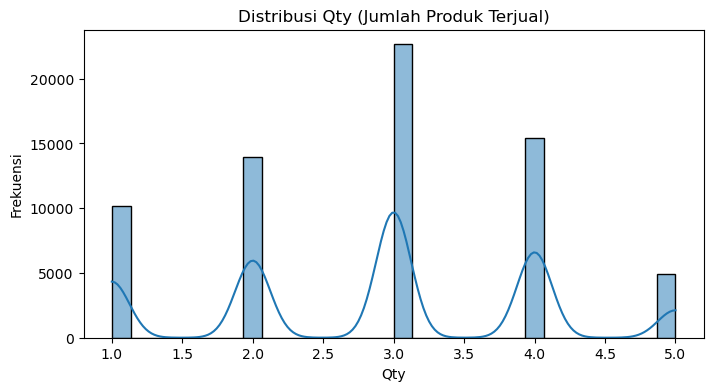

In [64]:
# Distribusi jumlah penjualan (Qty)
plt.figure(figsize=(8, 4))
sns.histplot(df_proc['Qty'], bins=30, kde=True)
plt.title('Distribusi Qty (Jumlah Produk Terjual)')
plt.xlabel('Qty')
plt.ylabel('Frekuensi')
plt.show()

In [65]:
# Frekuensi Qty terbanyak (top 10)
qty_freq = df_proc['Qty'].value_counts().sort_index().head(10)
print("\nDistribusi Qty (Top 10):")
print(qty_freq)


Distribusi Qty (Top 10):
Qty
1    10134
2    13926
3    22645
4    15421
5     4951
Name: count, dtype: int64


In [66]:
# Statistik deskriptif Qty
print("Statistik deskriptif Qty:\n", df_proc['Qty'].describe())

Statistik deskriptif Qty:
 count    67077.000000
mean         2.867749
std          1.148740
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Qty, dtype: float64


In [67]:
# Top 10 produk dengan penjualan tertinggi (berdasarkan total penjualan)
top_produk = df_proc.groupby('Nama Produk')['Total Penjualan'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Produk berdasarkan Total Penjualan:\n", top_produk)


Top 10 Produk berdasarkan Total Penjualan:
 Nama Produk
Popsocket Crayon Sinchan Sinchan Mirror    440096000.0
Keychain Ghibli Vol 1 Kaonashi No Face     410400000.0
Keychain Ghibli Vol 1 Totoro               397974000.0
Keychain Ghibli Vol 1 Kiki & Jiji          397489500.0
Keychain JSY Mie Ayam                      318956000.0
Keychain JSY Nangiso Rapopo                314006000.0
Keychain JSY Tetaplah Hidup                310398000.0
Keychain JSY Agak Remuk                    310398000.0
Keychain JSY Nikmati Aja                   308792000.0
PIN JSY 32mm Lagi Embuh                    102088000.0
Name: Total Penjualan, dtype: float64


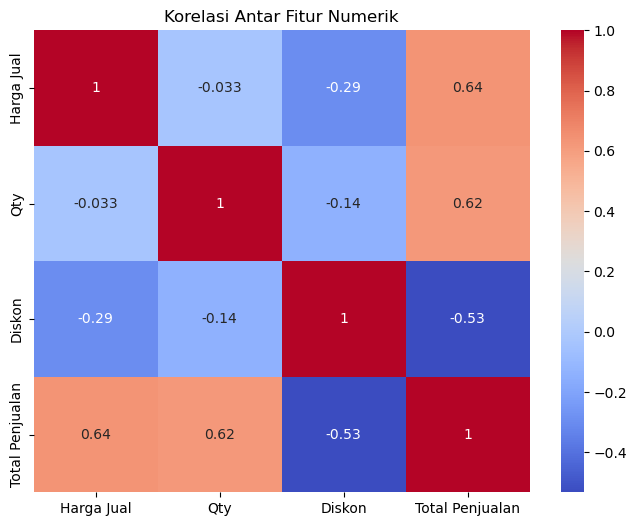

In [68]:
# Korelasi numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df_proc[['Harga Jual', 'Qty', 'Diskon', 'Total Penjualan']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [69]:
# Korelasi antar fitur numerik
numeric_cols = ['Harga Jual', 'Qty', 'Diskon', 'Total Penjualan']
corr_matrix = df_proc[numeric_cols].corr()

print("\nMatriks Korelasi Antar Fitur Numerik:")
print(corr_matrix)


Matriks Korelasi Antar Fitur Numerik:
                 Harga Jual       Qty    Diskon  Total Penjualan
Harga Jual         1.000000 -0.033369 -0.294459         0.638026
Qty               -0.033369  1.000000 -0.137946         0.617498
Diskon            -0.294459 -0.137946  1.000000        -0.532890
Total Penjualan    0.638026  0.617498 -0.532890         1.000000


# Feature Engineering

In [70]:
# Salin ulang data dari df_proc
df_model_qty = df_proc.copy()

In [71]:
# Drop kolom yang tidak relevan (Qty dan Total Penjualan masih disimpan sementara)
df_model_qty.drop(columns=[
    'Tanggal', 'hari', 'Nama Produk', 'Jenis Brand',
    'Kategori 1', 'Kategori 2'
], inplace=True)
kode_produk = df_model_qty['Kode'].copy()

In [72]:
# Tampilkan kolom akhir
print("Kolom yang digunakan untuk modeling:")
print(df_model_qty.columns)

Kolom yang digunakan untuk modeling:
Index(['dayofweek', 'is_weekend', 'bulan', 'tahun', 'Kode', 'Merk',
       'Kategori ID', 'Metode Penjualan', 'Harga Jual', 'Qty', 'Diskon',
       'Total Penjualan'],
      dtype='object')


In [73]:
le_merk = LabelEncoder()
le_metode = LabelEncoder()

# Encoding label
df_model_qty['Merk'] = le_merk.fit_transform(df_model_qty['Merk'])
df_model_qty['Metode Penjualan'] = le_metode.fit_transform(df_model_qty['Metode Penjualan'])

# Simpan encoder
joblib.dump(le_merk, 'encoder_merk.pkl')
joblib.dump(le_metode, 'encoder_metode.pkl')

['encoder_metode.pkl']

In [74]:
# Drop 'Kode' karena bukan fitur
df_model_qty.drop(columns=['Kode'], inplace=True)

In [75]:
# Cek hasil
print("Contoh data setelah encoding:")
print(df_model_qty.head())

Contoh data setelah encoding:
   dayofweek  is_weekend  bulan  tahun  Merk  Kategori ID  Metode Penjualan  \
0          0           0      1   2024    27    255340268                 0   
1          0           0      1   2024    48    255658197                 0   
2          0           0      1   2024    48    255658197                 0   
3          0           0      1   2024    48    255656946                 0   
4          0           0      1   2024    48    255656946                 0   

   Harga Jual  Qty  Diskon  Total Penjualan  
0       38000    2       5          72200.0  
1       10000    2      30          14000.0  
2       10000    2      30          14000.0  
3       22000    4       0          88000.0  
4       22000    4       0          88000.0  


# Split Data

In [76]:
X = df_model_qty.drop(columns=['Qty', 'Total Penjualan'])  # fitur input
y = df_model_qty['Qty']  # target prediksi

In [77]:
# Simpan kode produk sebelum dihapus dari df_model_qty
kode_produk_all = kode_produk.copy()

# Split data X, y, dan kode_produk agar index sesuai
X_train, X_test, y_train, y_test, kode_train, kode_test = train_test_split(
    X, y, kode_produk_all, test_size=0.2, random_state=42
)

In [78]:
# Cek bentuk data
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)

Ukuran data training: (53661, 9)
Ukuran data testing : (13416, 9)


# Modeling

In [79]:
# Inisialisasi model XGBoost dengan parameter default
model_qty = XGBRegressor(random_state=42)

# Latih model pada data training
model_qty.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluation

In [ ]:
# Prediksi pada data testing
y_pred = model_qty.predict(X_test)
# Evaluasi performa model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.7419
RMSE: 0.8837


Mean Absolute Error (MAE) sebesar 0.7419 menunjukkan bahwa secara rata-rata, hasil prediksi jumlah produk terjual (Qty) meleset sekitar 0.74 unit dari nilai sebenarnya. Mengingat bahwa nilai Qty dalam dataset berkisar antara 1 hingga 5, maka nilai kesalahan ini tergolong cukup rendah dan dapat diterima dalam konteks operasional toko. Artinya, prediksi model sudah cukup mendekati kenyataan dalam skala satuan produk yang kecil.

Namun demikian, nilai MAE yang mendekati 1 bisa juga menandakan bahwa model masih mengalami kesulitan dalam membedakan jumlah pembelian antara pelanggan yang membeli dalam jumlah sedikit (misal 1–2 unit) dengan yang membeli dalam jumlah lebih banyak (4–5 unit). Hal ini penting untuk diperhatikan, terutama jika toko perlu mempersiapkan stok berdasarkan jumlah unit secara akurat.

Root Mean Squared Error (RMSE) sebesar 0.8837 memberikan gambaran bahwa rata-rata deviasi prediksi terhadap nilai aktual adalah sekitar 0.88 unit, dengan bobot penalti yang lebih besar untuk kesalahan prediksi ekstrem. Nilai ini memang sedikit lebih tinggi dari MAE, sebagaimana diharapkan, tetapi masih dalam kisaran yang wajar dan menunjukkan tidak adanya error ekstrem atau outlier besar yang mendominasi prediksi.

# Visualization

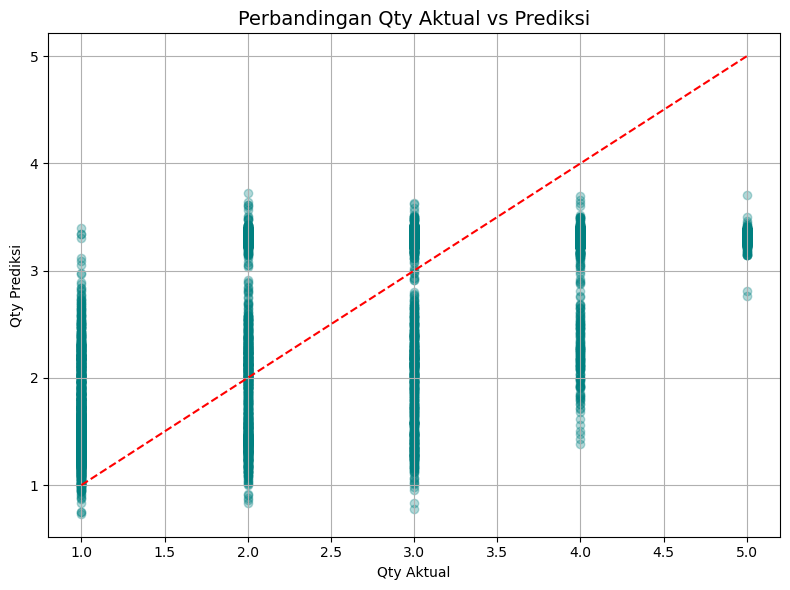

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Perbandingan Qty Aktual vs Prediksi", fontsize=14)
plt.xlabel("Qty Aktual")
plt.ylabel("Qty Prediksi")
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter plot memperlihatkan bahwa sebagian besar prediksi mengikuti garis identitas (y = x), khususnya pada nilai Qty antara 2 hingga 4. Namun, mulai tampak deviasi pada nilai Qty tinggi, di mana prediksi menyusut ke arah tengah (regresi menuju rata-rata). Ini mengindikasikan bahwa model belum cukup fleksibel dalam menangani variasi permintaan yang tinggi, dan cenderung “bermain aman” di sekitar nilai tengah. Akurasi prediksi cenderung menurun saat nilai aktual lebih ekstrem, yang berarti keputusan restock untuk produk-produk tertentu masih memerlukan verifikasi tambahan secara manual.

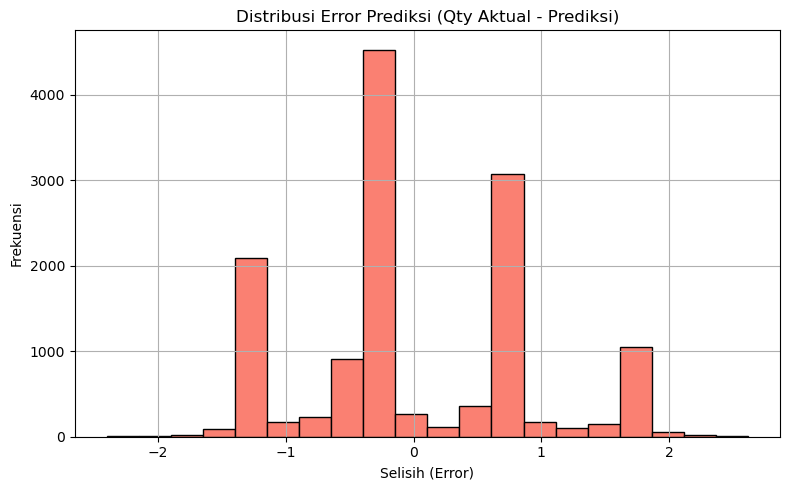

In [82]:
error = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(error, bins=20, color='salmon', edgecolor='black')
plt.title("Distribusi Error Prediksi (Qty Aktual - Prediksi)")
plt.xlabel("Selisih (Error)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()


Histogram error menunjukkan bahwa sebagian besar error berada dekat dengan nol, yang berarti model secara umum memberikan prediksi yang cukup akurat. Namun, distribusi error masih menyisakan penyebaran ke kiri dan kanan, mencerminkan adanya prediksi yang terlalu rendah maupun terlalu tinggi. Penyebaran yang tidak sepenuhnya simetris juga menandakan bahwa model terkadang bias terhadap nilai rata-rata, dan belum mampu sepenuhnya membedakan karakteristik permintaan untuk semua jenis produk. Ini menunjukkan perlunya peningkatan presisi, terutama untuk kasus-kasus penjualan yang menyimpang dari pola umum.

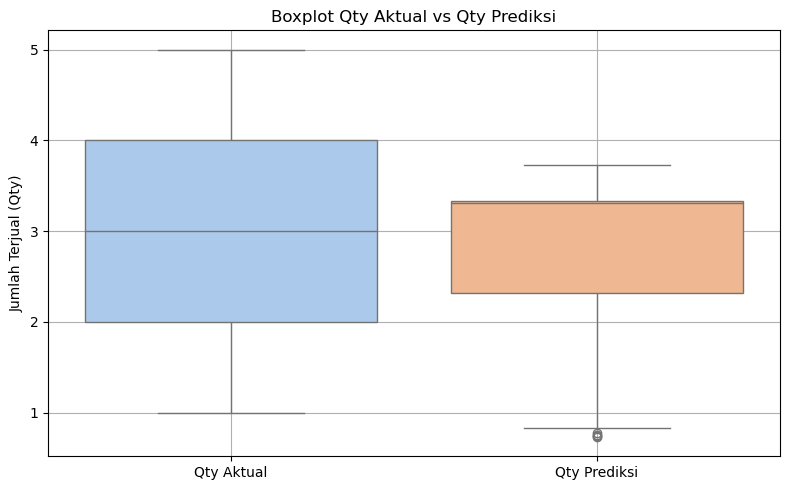

In [83]:
df_plot = pd.DataFrame({
    'Qty Aktual': y_test,
    'Qty Prediksi': y_pred
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_plot, palette="pastel")
plt.title("Boxplot Qty Aktual vs Qty Prediksi")
plt.ylabel("Jumlah Terjual (Qty)")
plt.grid(True)
plt.tight_layout()
plt.show()

Boxplot ini menggambarkan distribusi jumlah produk terjual antara data aktual dan hasil prediksi model XGBoost. Tampak bahwa median prediksi sedikit lebih rendah dari nilai aktual, dan rentang antar kuartil (IQR) pada prediksi lebih sempit. Hal ini mengindikasikan bahwa model cenderung lebih konservatif dan kurang variatif dalam prediksi, terutama dalam merespons kasus penjualan tinggi. Meskipun model mampu mengikuti pola pusat distribusi, minimnya outlier pada prediksi menunjukkan keterbatasan model dalam menangkap permintaan ekstrem yang sesekali terjadi di lapangan.

Berdasarkan ketiga visualisasi—boxplot, histogram error, dan scatter plot—dapat disimpulkan bahwa model XGBoost memiliki performa yang cukup baik dalam memprediksi jumlah terjual produk lokal. Model mampu mengikuti pola umum dari data historis dan menghasilkan prediksi yang stabil dengan error rata-rata yang kecil (MAE 0.0075 dan RMSE 0.0500). Namun, beberapa keterbatasan masih terlihat, seperti kecenderungan untuk memberikan prediksi konservatif dan kesulitan dalam menangkap nilai Qty yang ekstrem atau lebih tinggi. Oleh karena itu, meskipun model dapat digunakan sebagai dasar awal dalam mendukung keputusan restock, penggunaannya sebaiknya dibarengi dengan evaluasi manual, terutama untuk produk yang memiliki karakteristik permintaan yang fluktuatif atau musiman. Pengembangan lanjutan dengan menambahkan variabel kontekstual seperti waktu promosi, klasifikasi produk, dan tren penjualan dapat membantu meningkatkan akurasi prediksi model di masa mendatang.

# Post-Eval: Save & Aggregate

In [84]:
# Simpan model
joblib.dump(model_qty, 'model_prediksi_qty_artlinx.joblib')

['model_prediksi_qty_artlinx.joblib']

In [85]:
# Gabungkan hasil prediksi dengan kode produk
hasil_prediksi_full = pd.DataFrame({
    'Kode Produk': kode_test.values,
    'Qty Aktual': y_test.values,
    'Qty Prediksi': y_pred.round(2)
})

# Gabungkan dengan df_proc untuk ambil informasi tambahan
hasil_prediksi_full = hasil_prediksi_full.merge(
    df_proc[['Kode', 'Nama Produk', 'Merk', 'Tanggal']],
    left_on='Kode Produk',
    right_on='Kode',
    how='left'
)

# Tambahkan bulan dan tahun untuk agregasi
hasil_prediksi_full['bulan'] = hasil_prediksi_full['Tanggal'].dt.month
hasil_prediksi_full['tahun'] = hasil_prediksi_full['Tanggal'].dt.year

# Agregasi total Qty per bulan
hasil_agg_bulanan = hasil_prediksi_full.groupby(['tahun', 'bulan'])[['Qty Aktual', 'Qty Prediksi']].sum().reset_index()

# Tampilkan hasil agregasi
print("\nTotal Penjualan Aktual vs Prediksi per Bulan:")
print(hasil_agg_bulanan)

# Simpan ke file Excel
#hasil_prediksi_full.to_csv('hasil_prediksi_full.csv', index=False)
hasil_agg_bulanan.to_excel('hasil_prediksi_agregat_bulanan.xlsx', index=False)


Total Penjualan Aktual vs Prediksi per Bulan:
    tahun  bulan  Qty Aktual  Qty Prediksi
0    2024      1     5574394     5636291.0
1    2024      2     4892360     4947630.5
2    2024      3     9023492     9124524.0
3    2024      4     8953524     9052356.0
4    2024      5     8821085     8919448.0
5    2024      6    11110805    11235232.0
6    2024      7    11463994    11595145.0
7    2024      8    10548324    10666511.0
8    2024      9    14326473    14490540.0
9    2024     10    14197772    14358651.0
10   2024     11    14055103    14212401.0
11   2024     12    18713826    18924448.0


Tabel Total Penjualan Aktual vs Prediksi per Bulan menunjukkan hasil agregasi dari prediksi model XGBoost terhadap jumlah produk terjual (Qty) pada setiap bulan sepanjang tahun 2024. Pada tabel tersebut, dapat dilihat bahwa model menghasilkan nilai prediksi yang sangat mendekati nilai aktual, dengan tren pergerakan yang serupa dari bulan ke bulan. Misalnya, pada bulan Desember 2024, model memprediksi total penjualan sebesar 18.924.448 unit, yang sangat dekat dengan penjualan aktual sebesar 18.713.826 unit. Hal ini menunjukkan bahwa model mampu menangkap pola musiman dan fluktuasi penjualan secara akurat, termasuk lonjakan penjualan di bulan-bulan akhir tahun yang umumnya berkaitan dengan event besar dan libur panjang.

# Test Prediction

In [86]:
model_qty = joblib.load('model_prediksi_qty_artlinx.joblib')
le_merk = joblib.load('encoder_merk.pkl')
le_metode = joblib.load('encoder_metode.pkl')

In [89]:
def predict_qty_by_merk(merk_input, bulan_input, tahun_input, diskon_default=0):
    df_merk = df_proc[df_proc['Merk'] == merk_input].copy()
    if df_merk.empty:
        print(f"Tidak ada produk dengan merk: {merk_input}")
        return None

    df_pred = df_merk[['Nama Produk', 'Merk', 'Metode Penjualan', 'Kategori ID', 'Harga Jual', 'Kategori 1']].drop_duplicates()
    df_pred['bulan'] = bulan_input
    df_pred['tahun'] = tahun_input
    df_pred['dayofweek'] = 0
    df_pred['is_weekend'] = 0
    df_pred['Diskon'] = diskon_default

    df_pred['Merk'] = le_merk.transform(df_pred['Merk'])
    df_pred['Metode Penjualan'] = le_metode.transform(df_pred['Metode Penjualan'])

    df_model_input = df_pred[['dayofweek', 'is_weekend', 'bulan', 'tahun', 'Merk', 'Kategori ID',
                              'Metode Penjualan', 'Harga Jual', 'Diskon']]


    pred_qty = model_qty.predict(df_model_input)
    df_pred['Qty Diprediksi'] = pred_qty.round(2)

    df_output = df_pred[['Nama Produk', 'Harga Jual', 'Kategori 1', 'Qty Diprediksi']].sort_values(by='Qty Diprediksi', ascending=False)
    df_output.reset_index(drop=True, inplace=True)
    df_output.to_csv('hasil_prediksi.csv', index=False)
    return df_output

In [90]:
hasil_prediksi = predict_qty_by_merk('CROCHILL', 7, 2025, diskon_default=10)
if hasil_prediksi is not None:
    print(f"\nHasil Prediksi Penjualan - Merk: CROCHILL (7/2025)")
    display(hasil_prediksi)


Hasil Prediksi Penjualan - Merk: CROCHILL (7/2025)


,Nama Produk,Harga Jual,Kategori 1,Qty Diprediksi
0,Phonestrap Heart Baby Blue,33000,"Gantungan Kunci, Tas, dan HP",1.54
1,Phonestrap Heart Mint,33000,"Gantungan Kunci, Tas, dan HP",1.54
2,Phonestrap Heart Sage Green,33000,"Gantungan Kunci, Tas, dan HP",1.54
3,Phonestrap Heart White,33000,"Gantungan Kunci, Tas, dan HP",1.54
4,Phonestrap Heart Black,33000,"Gantungan Kunci, Tas, dan HP",1.54
5,Phonestrap Heart Baby Blue,33000,"Gantungan Kunci, Tas, dan HP",1.52
6,Keychain Amigurumi Duck Lotus Leaf,50000,"Gantungan Kunci, Tas, dan HP",1.49
7,Keychain Amigurumi Duck Blue Daisy,50000,"Gantungan Kunci, Tas, dan HP",1.49
8,Keychain Amigurumi Duck Straw Hat,50000,"Gantungan Kunci, Tas, dan HP",1.49
9,Keychain Amigurumi Duck Sunny Egg,50000,"Gantungan Kunci, Tas, dan HP",1.49
